Install Libraries

In [3]:
#install Libraries
%pip install numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


Define Variables and Equations

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Main Parameters
GDP_current = 27.36  # in trillion USD
population = 0.3349  # in billion people
wealth_top10_current = 60  # in percentage

# GDP Parameters (2023)
beta_C = 0.6817  
beta_I = 0.207  
beta_G = 0.207  
GDP_elasticity = beta_C + beta_I + beta_G
wealth_elasticity = 0.4 + 0.1


tax_change = 0.20  
tariff_increase = 0.25  
policy_shift_min = 0
policy_shift_max = tariff_increase  
policy_shift = np.linspace(policy_shift_min, policy_shift_max, 100)


# Functions
def GDP_func(theta):
    return GDP_current * (1 + GDP_elasticity * theta)

def GDP_pc_func(theta):
    return GDP_func(theta) / population

def Wealth_func(theta):
    return wealth_top10_current * (1 + wealth_elasticity * theta)

#Generate Data
GDP_values = np.array([GDP_func(theta) for theta in policy_shift])
GDP_pc_values = np.array([GDP_pc_func(theta) for theta in policy_shift])
Wealth_values = np.array([Wealth_func(theta) for theta in policy_shift])

data = pd.DataFrame({
    'policy_shift': policy_shift,
    'GDP_values': GDP_values,
    'GDP_pc_values': GDP_pc_values,
    'Wealth_values': Wealth_values
})

Change in GDP

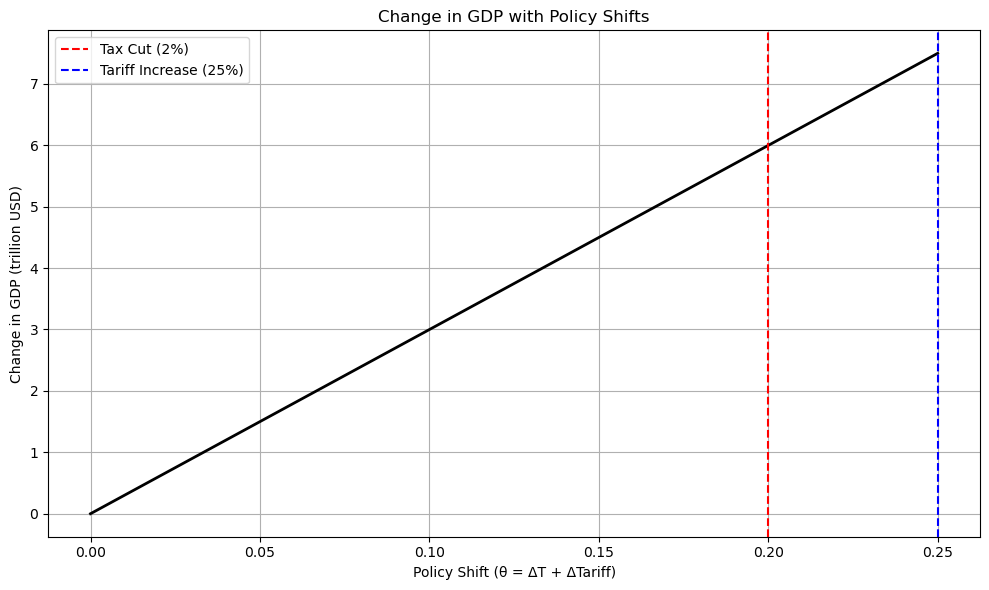

In [5]:
#Plot Change in GDP
plt.figure(figsize=(10, 6))
plt.plot(data['policy_shift'], data['GDP_values'] - GDP_current, color='black', linewidth=2)
plt.axvline(tax_change, color='red', linestyle='dashed', label='Tax Cut (2%)')
plt.axvline(tariff_increase, color='blue', linestyle='dashed', label='Tariff Increase (25%)')
plt.title("Change in GDP with Policy Shifts")
plt.xlabel("Policy Shift (θ = ΔT + ΔTariff)")
plt.ylabel("Change in GDP (trillion USD)")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("change_in_GDP.png", dpi=300)
plt.show()


Change in GDP Per Capita

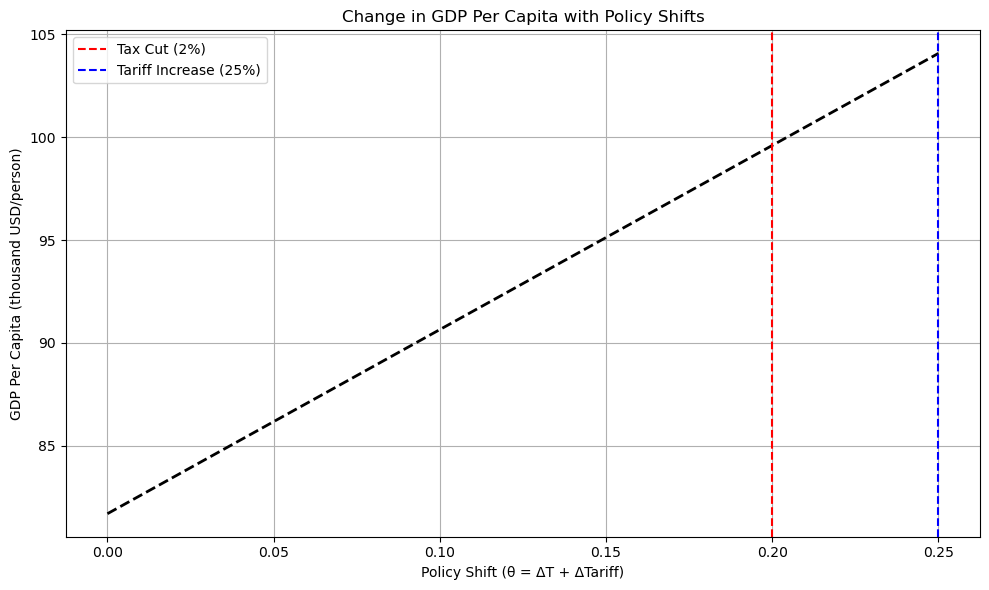

In [6]:
#Plot Change in GDP Per Capita
plt.figure(figsize=(10, 6))
plt.plot(data['policy_shift'], data['GDP_pc_values'], color='black', linewidth=2, linestyle='dashed')
plt.axvline(tax_change, color='red', linestyle='dashed', label='Tax Cut (2%)')
plt.axvline(tariff_increase, color='blue', linestyle='dashed', label='Tariff Increase (25%)')
plt.title("Change in GDP Per Capita with Policy Shifts")
plt.xlabel("Policy Shift (θ = ΔT + ΔTariff)")
plt.ylabel("GDP Per Capita (thousand USD/person)")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("change_in_GDP_per_capita.png", dpi=300)
plt.show()

Change In Wealth Disparity

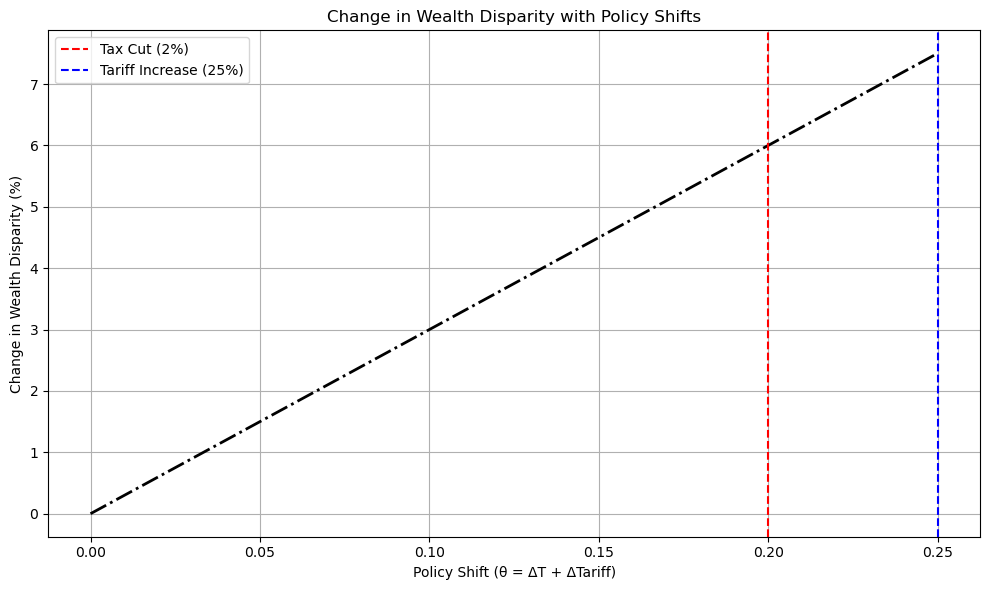

In [ ]:
#Change In Wealth Disparity
plt.figure(figsize=(10, 6))
plt.plot(data['policy_shift'], data['Wealth_values'] - wealth_top10_current, color='black', linewidth=2, linestyle='dashdot')
plt.axvline(tax_change, color='red', linestyle='dashed', label='Tax Cut (2%)')
plt.axvline(tariff_increase, color='blue', linestyle='dashed', label='Tariff Increase (25%)')
plt.title("Change in Wealth Disparity with Policy Shifts")
plt.xlabel("Policy Shift (θ = ΔT + ΔTariff)")
plt.ylabel("Change in Wealth Disparity (%)")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("change_in_wealth_disparity.png", dpi=300)
plt.show()


Wealth Disparity's Response to Shift (Table)

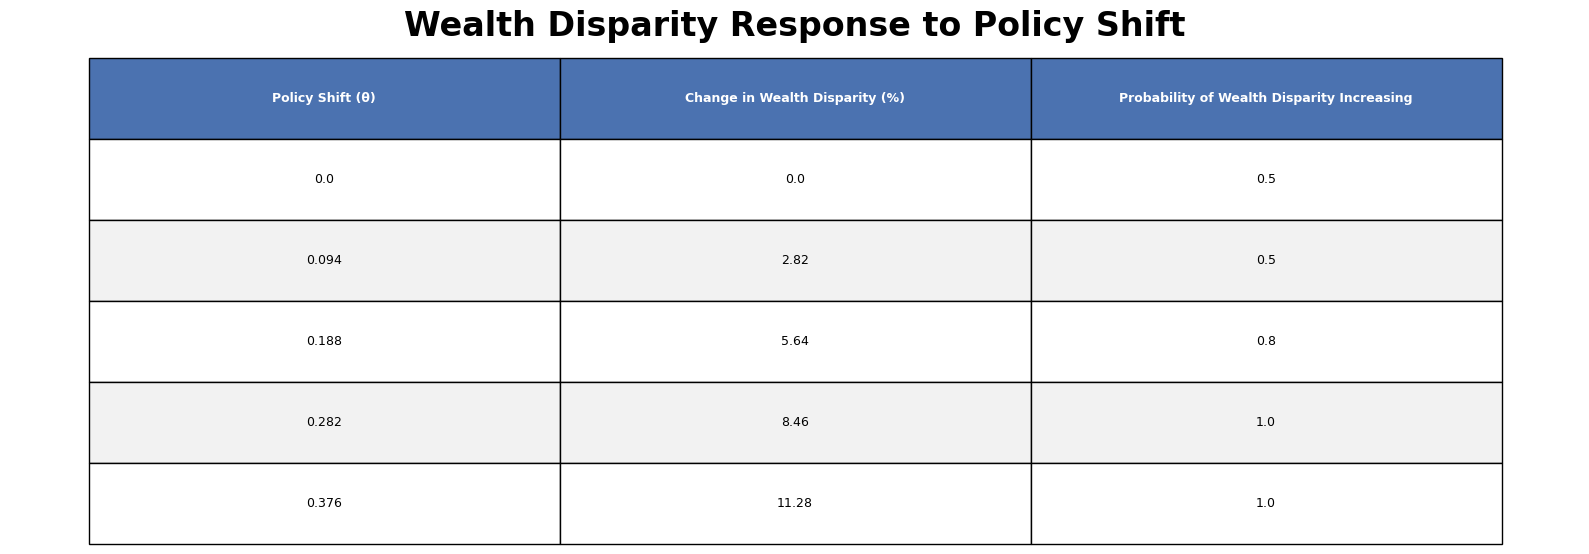

In [ ]:
#Table
# Define key variables
policy_shift_levels = np.arange(0, 0.47, 0.094)
wealth_top10_current = 60
wealth_elasticity = 0.4 + 0.1

def Wealth_func(theta):
    return wealth_top10_current * (1 + wealth_elasticity * theta)

wealth_changes = np.array([Wealth_func(theta) - wealth_top10_current for theta in policy_shift_levels])
probability_increase = np.where(wealth_changes < 3, 0.50,
                                np.where(wealth_changes < 6, 0.80, 1.00))

results = pd.DataFrame({
    'Policy Shift (θ)': np.round(policy_shift_levels, 3),
    'Change in Wealth Disparity (%)': np.round(wealth_changes, 2),
    'Probability of Wealth Disparity Increasing': probability_increase
})

# Combine headers and values for the table
table_data = [results.columns.tolist()] + results.values.tolist()


fig, ax = plt.subplots(figsize=(16, 6))  # Wide format
ax.axis('off')  # Hide axes

#Title
plt.text(0.5, 1.22, "Wealth Disparity Response to Policy Shift",
         fontsize=24, fontweight='bold', ha='center', transform=ax.transAxes)

# Create the table
the_table = plt.table(cellText=table_data,
                      cellLoc='center',
                      loc='center',
                      colWidths=[0.3]*len(results.columns))

# Style the table
for (row, col), cell in the_table.get_celld().items():
    cell.set_fontsize(22)  
    cell.set_height(0.22)  

    if row == 0:  # Header row
        cell.set_text_props(weight='bold', color='white', fontsize=22) 
        cell.set_facecolor('#4B72B0')
    elif row % 2 == 0:
        cell.set_facecolor('#F2F2F2') 
    else:
        cell.set_facecolor('white')


plt.tight_layout()
plt.savefig("wealth_disparity_probability_table.png", dpi=300, bbox_inches='tight')
plt.show()

Code All Together

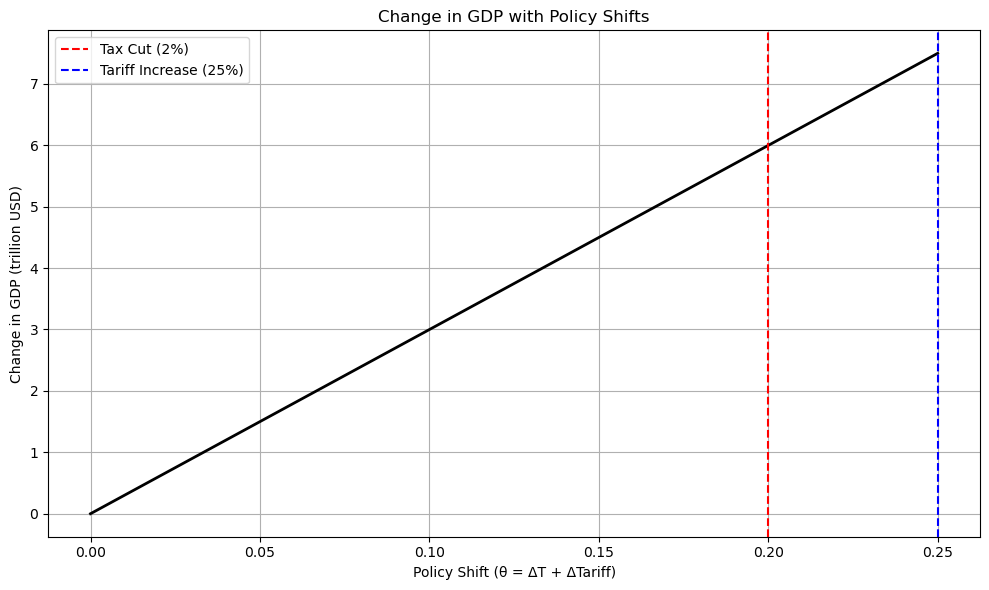

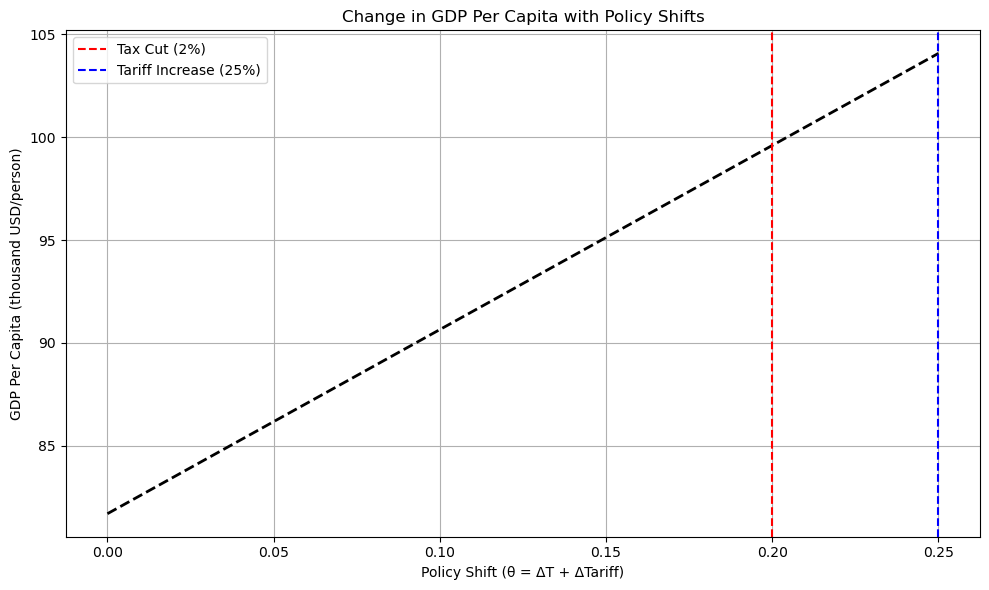

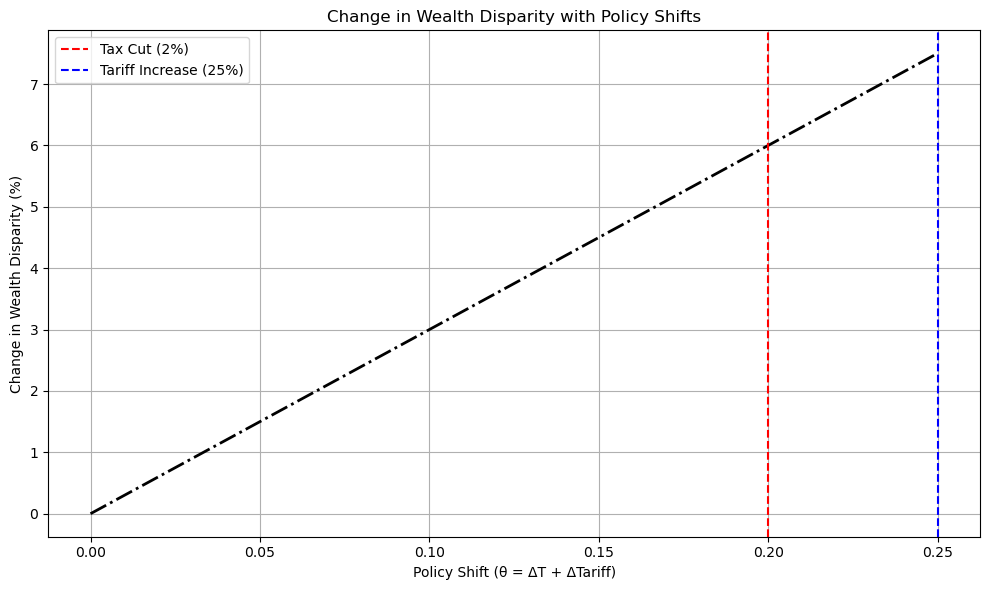

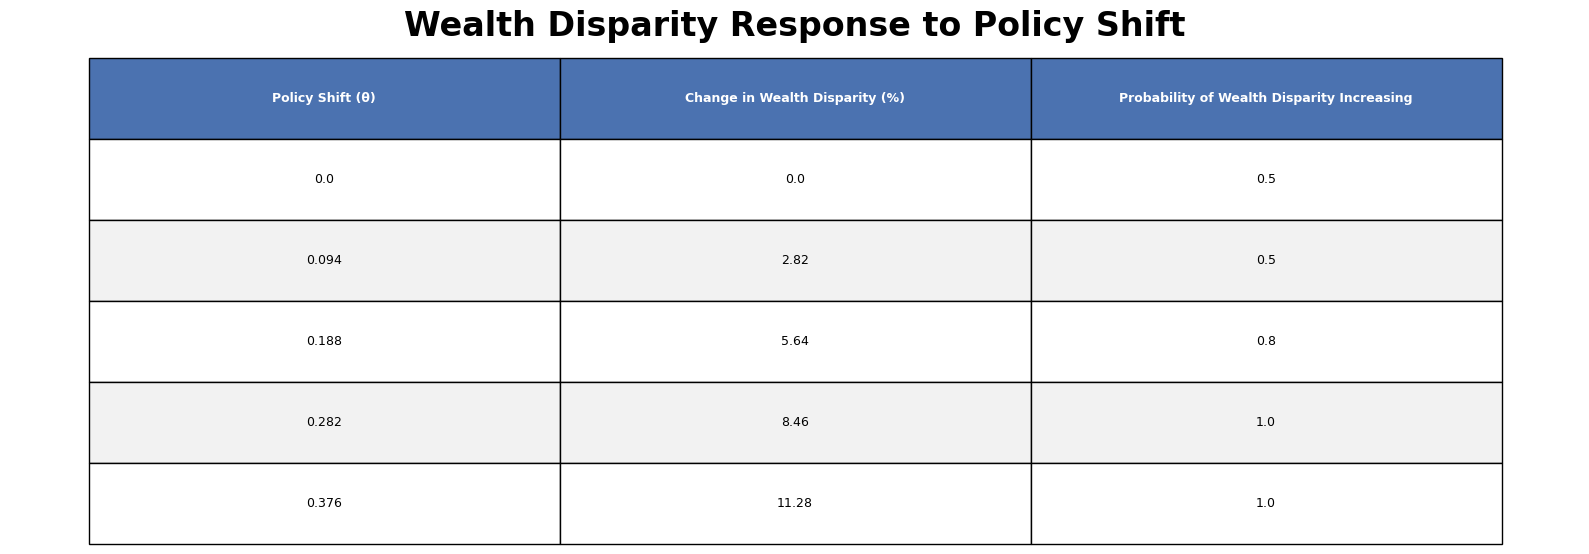

In [9]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Main Parameters
GDP_current = 27.36  # in trillion USD
population = 0.3349  # in billion people
wealth_top10_current = 60  # in percentage

# GDP Parameters (2023)
beta_C = 0.6817  
beta_I = 0.207  
beta_G = 0.207  
GDP_elasticity = beta_C + beta_I + beta_G
wealth_elasticity = 0.4 + 0.1


tax_change = 0.20  
tariff_increase = 0.25  
policy_shift_min = 0
policy_shift_max = tariff_increase  
policy_shift = np.linspace(policy_shift_min, policy_shift_max, 100)


# Functions
def GDP_func(theta):
    return GDP_current * (1 + GDP_elasticity * theta)

def GDP_pc_func(theta):
    return GDP_func(theta) / population

def Wealth_func(theta):
    return wealth_top10_current * (1 + wealth_elasticity * theta)

#Generate Data
GDP_values = np.array([GDP_func(theta) for theta in policy_shift])
GDP_pc_values = np.array([GDP_pc_func(theta) for theta in policy_shift])
Wealth_values = np.array([Wealth_func(theta) for theta in policy_shift])

data = pd.DataFrame({
    'policy_shift': policy_shift,
    'GDP_values': GDP_values,
    'GDP_pc_values': GDP_pc_values,
    'Wealth_values': Wealth_values
})

#Plot Change in GDP
plt.figure(figsize=(10, 6))
plt.plot(data['policy_shift'], data['GDP_values'] - GDP_current, color='black', linewidth=2)
plt.axvline(tax_change, color='red', linestyle='dashed', label='Tax Cut (2%)')
plt.axvline(tariff_increase, color='blue', linestyle='dashed', label='Tariff Increase (25%)')
plt.title("Change in GDP with Policy Shifts")
plt.xlabel("Policy Shift (θ = ΔT + ΔTariff)")
plt.ylabel("Change in GDP (trillion USD)")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("change_in_GDP.png", dpi=300)
plt.show()

#Plot Change in GDP Per Capita
plt.figure(figsize=(10, 6))
plt.plot(data['policy_shift'], data['GDP_pc_values'], color='black', linewidth=2, linestyle='dashed')
plt.axvline(tax_change, color='red', linestyle='dashed', label='Tax Cut (2%)')
plt.axvline(tariff_increase, color='blue', linestyle='dashed', label='Tariff Increase (25%)')
plt.title("Change in GDP Per Capita with Policy Shifts")
plt.xlabel("Policy Shift (θ = ΔT + ΔTariff)")
plt.ylabel("GDP Per Capita (thousand USD/person)")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("change_in_GDP_per_capita.png", dpi=300)
plt.show()

#Change In Wealth Disparity
plt.figure(figsize=(10, 6))
plt.plot(data['policy_shift'], data['Wealth_values'] - wealth_top10_current, color='black', linewidth=2, linestyle='dashdot')
plt.axvline(tax_change, color='red', linestyle='dashed', label='Tax Cut (2%)')
plt.axvline(tariff_increase, color='blue', linestyle='dashed', label='Tariff Increase (25%)')
plt.title("Change in Wealth Disparity with Policy Shifts")
plt.xlabel("Policy Shift (θ = ΔT + ΔTariff)")
plt.ylabel("Change in Wealth Disparity (%)")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("change_in_wealth_disparity.png", dpi=300)
plt.show()

#Table
# Define key variables
policy_shift_levels = np.arange(0, 0.47, 0.094)
wealth_top10_current = 60
wealth_elasticity = 0.4 + 0.1

def Wealth_func(theta):
    return wealth_top10_current * (1 + wealth_elasticity * theta)

wealth_changes = np.array([Wealth_func(theta) - wealth_top10_current for theta in policy_shift_levels])
probability_increase = np.where(wealth_changes < 3, 0.50,
                                np.where(wealth_changes < 6, 0.80, 1.00))

results = pd.DataFrame({
    'Policy Shift (θ)': np.round(policy_shift_levels, 3),
    'Change in Wealth Disparity (%)': np.round(wealth_changes, 2),
    'Probability of Wealth Disparity Increasing': probability_increase
})

# Combine headers and values for the table
table_data = [results.columns.tolist()] + results.values.tolist()


fig, ax = plt.subplots(figsize=(16, 6))  
ax.axis('off')

#Title
plt.text(0.5, 1.22, "Wealth Disparity Response to Policy Shift",
         fontsize=24, fontweight='bold', ha='center', transform=ax.transAxes)

# Create the table
the_table = plt.table(cellText=table_data,
                      cellLoc='center',
                      loc='center',
                      colWidths=[0.3]*len(results.columns))

# Style the table
for (row, col), cell in the_table.get_celld().items():
    cell.set_fontsize(22)  # Large table text
    cell.set_height(0.22)  # Adjust row height

    if row == 0:  # Header row
        cell.set_text_props(weight='bold', color='white', fontsize=22) 
        cell.set_facecolor('#4B72B0')
    elif row % 2 == 0:
        cell.set_facecolor('#F2F2F2')  
    else:
        cell.set_facecolor('white')


plt.tight_layout()
plt.savefig("wealth_disparity_probability_table.png", dpi=300, bbox_inches='tight')
plt.show()
